In [15]:
import cv2
import numpy as np
import skimage.exposure
import matplotlib.pyplot as plt

In [65]:
green = cv2.imread('ORG_data/images/150_20200719030004_3012_t.jpg')
green = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
orange = cv2.imread('ORG_data/images/290_20210810234134_23617.jpg')
orange = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)
lightG = cv2.imread('ORG_data/images/153_20200720015226_33149.jpg')
lightG = cv2.cvtColor(lightG, cv2.COLOR_BGR2RGB)
purple = cv2.imread('ORG_data/images/196_20200814231016_10984.jpg')
purple = cv2.cvtColor(purple, cv2.COLOR_BGR2RGB)

full = cv2.imread('detection_data/images/192_20200715165926.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

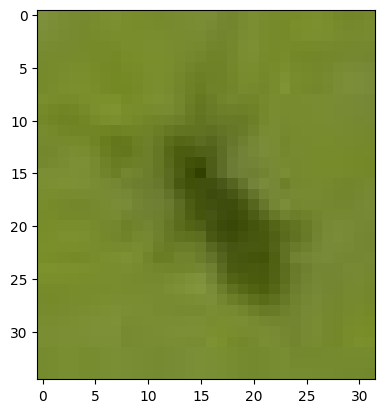

In [31]:
plt.imshow(green)

In [32]:
lab = cv2.cvtColor(green,cv2.COLOR_RGB2LAB)

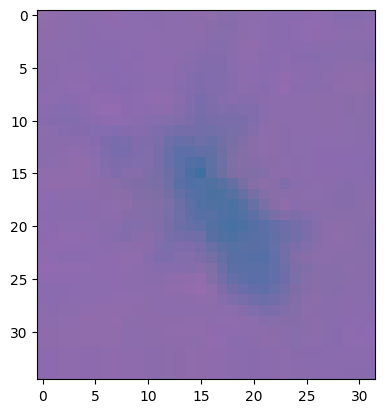

In [33]:
plt.imshow(lab)

In [34]:
A = lab[:,:,1]

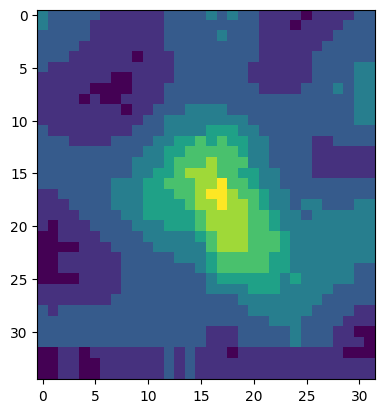

In [35]:
plt.imshow(A)

In [36]:
thresh = cv2.threshold(A, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

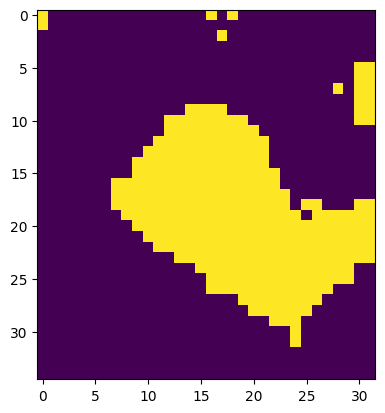

In [37]:
plt.imshow(thresh)

In [38]:
blur = cv2.GaussianBlur(thresh, (0,0), sigmaX=5, sigmaY=5, borderType = cv2.BORDER_DEFAULT)

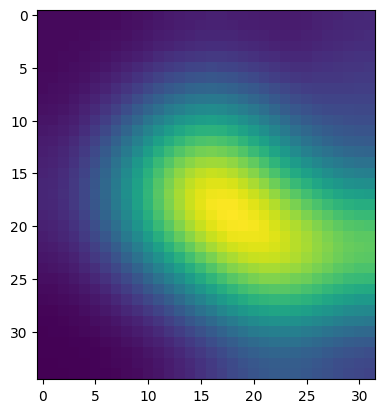

In [39]:
plt.imshow(blur)

In [40]:
mask = skimage.exposure.rescale_intensity(blur, in_range=(127.5,255), out_range=(0,255)).astype(np.uint8)

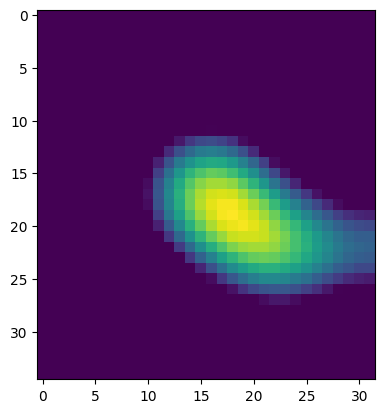

In [41]:
plt.imshow(mask)

In [42]:
result = green.copy()
result = cv2.cvtColor(green,cv2.COLOR_RGB2BGRA)
result[:,:,3] = mask

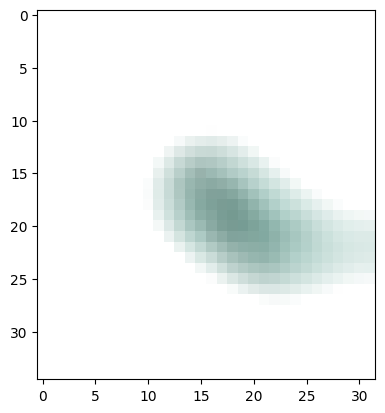

In [43]:
plt.imshow(result)

In [46]:
result2 = cv2.cvtColor(result, cv2.COLOR_BGRA2RGBA)

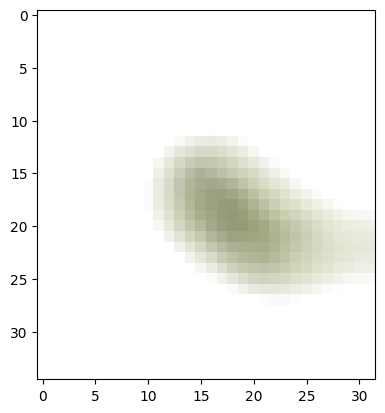

In [47]:
plt.imshow(result2)

In [69]:
img = cv2.imread('detection_data/images/192_20200715165926.jpg')
# img = cv2.imread('ORG_data/images/150_20200719030004_3012_t.jpg')
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
a_channel = lab[:,:,1]
th = cv2.threshold(a_channel,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
masked = cv2.bitwise_and(img, img, mask = th)    # contains dark background
m1 = masked.copy()
m1[th==0]=(255,255,255)                          # contains white background

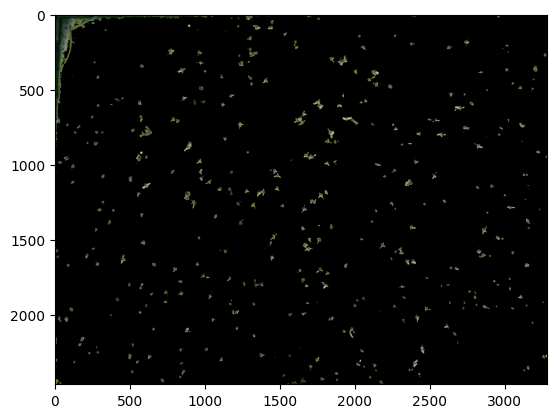

In [71]:
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

In [50]:
mlab = cv2.cvtColor(masked, cv2.COLOR_BGR2LAB)
dst = cv2.normalize(mlab[:,:,1], dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

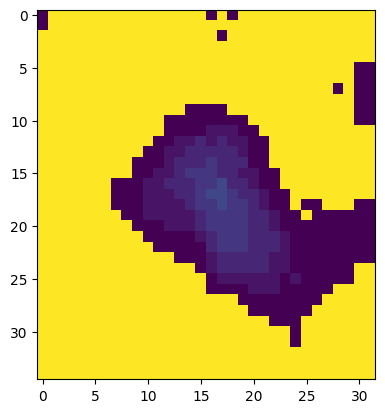

In [51]:
plt.imshow(dst)

In [52]:
threshold_value = 100
dst_th = cv2.threshold(dst, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]

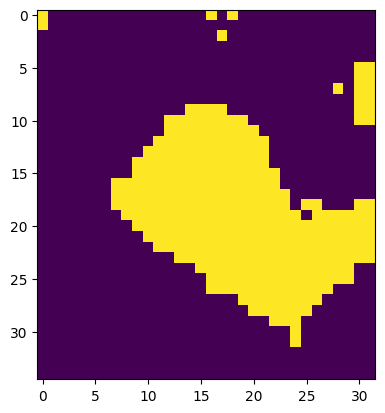

In [53]:
plt.imshow(dst_th)

In [54]:
mlab2 = mlab.copy()
mlab[:,:,1][dst_th == 255] = 127

In [55]:
img2 = cv2.cvtColor(mlab, cv2.COLOR_LAB2BGR)
img2[th==0]=(255,255,255)

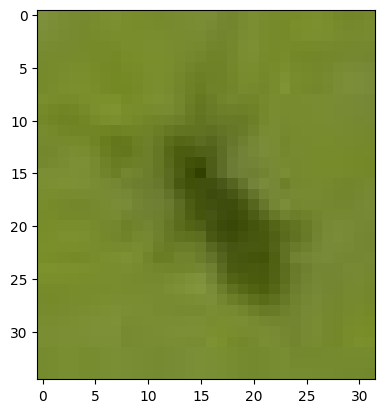

In [60]:
plt.imshow(green)

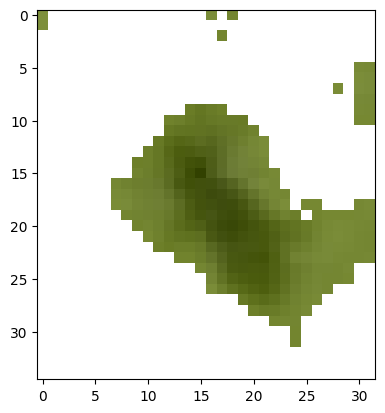

In [59]:
plt.imshow(cv2.cvtColor(m1, cv2.COLOR_BGR2RGB))

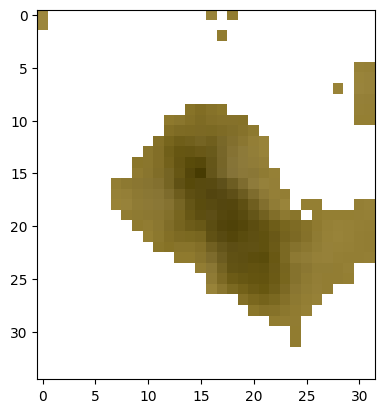

In [57]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))